In [2]:
#%tensorflow_version 1.x

import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [3]:
import numpy as np
import cv2
import keras
from keras import optimizers
from keras.models import *
from keras.layers import Input, merge, Conv2D, concatenate, Add,Layer
from keras.optimizers import *
from math import pi as pi
from scipy import signal
from keras import backend as K
from math import pi as pi
import matplotlib.pyplot as plt


def activation_square(x):
    return tf.math.square(x)


def spiral_kxky(filename, ledNum):
    kxky = [[], []]
    with open(filename, 'r') as file:
        for line in file:
            for j, value in enumerate(line.split(",")):
                kxky[j].append(np.float(value))
    kxky = np.asarray(kxky)
    kxky = kxky.T
    return kxky[:ledNum, :]


def show_result(model, show=0, noShow=10):
    w_conv1 = model.get_layer('conv_O').get_weights()
    w_conv1_array = np.asarray(w_conv1)
    c_real = w_conv1_array[:, :, :, 0, :].reshape((imSize, imSize))
    c_imag = w_conv1_array[:, :, :, 1, :].reshape((imSize, imSize))
    
    c_complex = c_real + 1j * c_imag  
    c_abs = np.flip(np.flip(np.abs(c_complex), 0), 1)
    c_phase = np.flip(np.flip(np.angle(c_complex), 0), 1)
    c_complexFTLog = np.log(np.abs(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(c_complex)))))
    objFTLog = np.log(np.abs(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(obj)))))
    
    if show:
        plt.figure()
        plt.subplot(231),plt.imshow(c_abs[noShow:imSize-noShow, noShow:imSize-noShow], cmap='gray'),plt.title('recover (abs)')
        plt.subplot(232),plt.imshow(c_phase[noShow:imSize-noShow, noShow:imSize-noShow], cmap='gray'),plt.title('recover (phase)')
        plt.subplot(233),plt.imshow(c_complexFTLog[noShow:imSize-noShow, noShow:imSize-noShow], cmap='gray'),plt.title('recover FT')
        plt.subplot(234),plt.imshow(np.abs(obj[noShow:imSize-noShow, noShow:imSize-noShow]), cmap='gray'),plt.title('high res (abs)')
        plt.subplot(235),plt.imshow(np.angle(obj[noShow:imSize-noShow, noShow:imSize-noShow]), cmap='gray'),plt.title('high res (phase)')
        plt.subplot(236),plt.imshow(objFTLog[noShow:imSize-noShow, noShow:imSize-noShow], cmap='gray'),plt.title('high res FT')
        plt.show()
        
    return c_complex

In [4]:
#Set parameters of FPM

#path_square
path ="/content/drive/My Drive/Stage/bas_reso.mat"

#how much the resolution will be increased
index_downSample = 4 
# wavefront length
wlength = 0.532*1e-6
# numerical aperture
NA = 0.1
k0 = 2 * pi / wlength
#magnification of len
magnif = 2
#pixel size
spsize = (3.45*1e-6)/magnif
psize = spsize/index_downSample
#image size in low resolution
crop = 100
imSize = crop*index_downSample
imCenter = int(imSize / 2)
# root of the leds matrix size
arraysize = 15
NAstep = 0.05
Format = "Square"

#path_spiral
#path = "/content/drive/My Drive/Stage/bas_reso_spiral.mat"

# index_downSample = 4 # downsample: index_downSample=4
# wlength = 0.465*1e-6
# NA = 0.75
# k0 = 2 * pi / wlength
# magnif = 22.2222
# spsize = (3.45*1e-6)/magnif
# psize = spsize/index_downSample
# crop = 100
# imSize = crop*index_downSample
# imCenter = int(imSize / 2)
# arraysize = 5
# NAstep = 0.05
# dz = 21
# Format = "Spiral"

In [5]:
!pip install LightPipes

     |████████████████████████████████| 51kB 4.6MB/s 


/usr/local/lib/python3.7/dist-packages/LightPipes/propagators.py:27: UserWarning: 
**************************** WARNING ***********************
LightPipes: Cannot import pyFFTW, falling back to numpy.fft.
(Try to) install pyFFTW on your computer for faster performance.
Enter at a terminal prompt: python -m pip install pyfftw.
Or reinstall LightPipes with the option pyfftw
Enter: python -m pip install lightpipes[pyfftw]

You can suppress warnings by using the -Wignore option:
Enter: python _Wignore *****.py
*************************************************************
  warnings.warn(_WARNING)


0
0
1
1
1
-1
2
0
2
-2
2
2
3
-1
3
1
3
-3


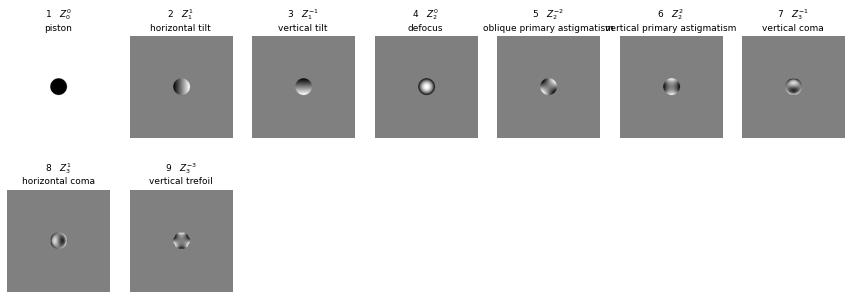

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
!pip install LightPipes

from LightPipes import *
import matplotlib.pyplot as plt
import math

wavelength=532*nm
dkxy = 2*math.pi/psize/(imSize-1)
cutoffFrequency = (NA * k0 / dkxy)

size=cutoffFrequency
N=imSize
A=wavelength/(2*math.pi)

plt.figure(figsize=(15,8)) 
for Noll in range (1,10):
    (nz,mz)=noll_to_zern(Noll)
    print(nz)
    print(mz)
    S=ZernikeName(Noll)
    F=Begin(N,psize,N)
    F=Zernike(nz,mz,size,A,F)
    F=CircAperture(size,0,0,F)
    Phi=Phase(F)
    plt.subplot(3,7,Noll)
    plt.imshow(Phi, cmap='gray')
    s=repr(Noll) + '  ' + ' $Z^{'+repr(mz)+'}_{'+repr(nz)+'}$' + '\n' + S
    plt.title(s, fontsize=9);plt.axis('off')
plt.show()

print(Phi)

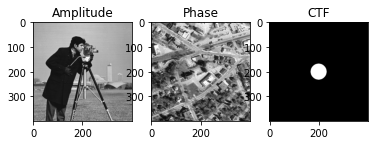

-3.12740897938063
3.127408979380629


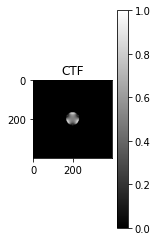

In [ ]:
# Load image
imgAmp = cv2.imread('/content/drive/My Drive/Stage/Code_zheng/FPM_Simulation_exitWaveNet/Cameraman.bmp', 0)
imgAmp = imgAmp +10
imgAmp = cv2.resize(imgAmp, (imSize, imSize), interpolation=cv2.INTER_CUBIC).astype(float) # input amplitude
imgPhase = cv2.imread('/content/drive/My Drive/Stage/Code_zheng/FPM_Simulation_exitWaveNet/westconcordorthophoto.bmp', 0)
imgPhase = cv2.resize(imgPhase, (imSize, imSize), interpolation=cv2.INTER_CUBIC).astype(float) # input phase
imgPhase = cv2.normalize(imgPhase, None, -1, 1.0, cv2.NORM_MINMAX)
obj = imgAmp * np.exp(1j * 0.5 * pi * imgPhase)

# Generate CTF
dkxy = 2*pi/psize/(imSize-1)
cutoffFrequency = (NA * k0 / dkxy)
center = [imCenter, imCenter]
kYY, kXX = np.ogrid[:imSize, :imSize]
CTF = np.sqrt((kXX - center[0]) ** 2 + (kYY - center[1]) ** 2) <= cutoffFrequency
CTF_b = CTF.astype(float)

# Show input image and CTF
plt.figure()
plt.subplot(1, 3, 1),plt.imshow(imgAmp, cmap='gray'),plt.title('Amplitude')
plt.subplot(1, 3, 2),plt.imshow(imgPhase, cmap='gray'),plt.title('Phase')
plt.subplot(1, 3, 3),plt.imshow(CTF, cmap='gray'),plt.title('CTF')
plt.show()

CTF = Phi

print(np.amin(CTF))
print(np.amax(CTF))

CTF = CTF/np.amax(CTF)

for i in range(imSize):
  for j in range(imSize):
      CTF[i,j] = CTF[i,j] +1
      CTF[i,j] = CTF[i,j] /2
        

CTF = CTF*CTF_b
plt.subplot(1, 3, 3),plt.imshow(CTF, cmap='gray'),plt.title('CTF'),plt.colorbar()
plt.show()

In [ ]:
kxky = spiral_kxky('/content/drive/My Drive/Stage/Code/FPM_Simulation_exitWaveNet/spiral_4.txt', arraysize ** 2) # load kx, ky here
print('kxky shape:',kxky.shape)

px = np.ndarray((arraysize ** 2))
py = np.ndarray((arraysize ** 2))
ledSeq = [0,18,16,17,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,24,23,22,21,20,19]

H = 21
n = nglass = 1.52
h = 1
sita = 0
xint = 0
yint = 0 
total = arraysize**2

xi = 0
yi = 0

count = 0 
for i in ledSeq:
  x0 = kxky[i,0]
  y0 = kxky[i,1]


  l=np.sqrt(x0**2+y0**2)          # distance of LED from origin
  thetal=np.arctan2(y0,x0)        # angle of LED in x-y plane

  xoff=0                          #; % initial guess where beam enters bottom of slide
  
  thetag=-1*np.arcsin((l/np.sqrt(l**2+H**2))/n)     # get angle of beam in glass from Snell's law
  xint=h*np.tan(thetag)                            #% find where the beam exits the top of the slide
  xoff=xoff-xint                                # % modify guess where beam enters bottom of slide by this amount


  # % repeat the above procedure until the beam exits the top of the slide
  # % within 1 micron of center
  while abs(xint) > 0.001:
      thetag=-np.arcsin((l-xoff)/np.sqrt(((l-xoff)**2)+H**2)/n)
      xint=xoff+h*np.tan(thetag)
      xoff=xoff-xint

  # % angle under the glass and angle over the cover slip
  # % FPM treats this as the angle in the sample so pretends the sample has
  # % refractive index 1.0
  theta=np.arcsin((l-xoff)/np.sqrt((l-xoff)**2+H**2))
    

  NAt=abs(np.sin(theta))
  kx = -NAt * np.cos(thetal)
  ky = -NAt * np.sin(thetal)


  px[count] = kx
  py[count] = ky
  print(px[i],py[i])
  count =  count +1


In [ ]:
# Generate low res images
imgs_train_input1 = np.ndarray((arraysize ** 2, imSize, imSize, 2)) # input real(PSF), -imag(PSF)
imgs_train_input2 = np.ndarray((arraysize ** 2, imSize, imSize, 2)) # input imag(PSF), real(PSF)
PSF_tot = np.ndarray((arraysize ** 2, imSize, imSize, 2)) # input imag(PSF), real(PSF)
kxky = spiral_kxky('/content/drive/My Drive/Stage/Code/FPM_Simulation_exitWaveNet/spiral_kxky.txt', arraysize ** 2)   # load kx, ky here
print('kxky shape:',kxky.shape)
for i in range(arraysize ** 2):
    if(Format == "Spiral"):
        kx = py[i]
        ky = px[i]*-1
    elif(Format == "Square"):
        kx = kxky[i,0] * NAstep
        ky = kxky[i,1] * NAstep
    kxIllu = int(kx * k0 / dkxy)
    kyIllu = int(ky * k0 / dkxy)
    ctfIllu = np.roll(CTF, [kxIllu, kyIllu], axis=(0, 1))    
    psfIllu = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(ctfIllu)))
    psfIlluReal = np.real(psfIllu)
    psfIlluImag = np.imag(psfIllu)
    PSF_tot[i, :, :, 0] =  ctfIllu
    imgs_train_input1[i, :, :, 0] = 1 * psfIlluReal
    imgs_train_input1[i, :, :, 1] = -1 * psfIlluImag    
    imgs_train_input2[i, :, :, 0] = 1 * psfIlluImag
    imgs_train_input2[i, :, :, 1] = 1 * psfIlluReal

# show result 
print('Input real(PSF)')
print(np.amin(imgs_train_input1[:, :, :, 0]))
print(np.amax(imgs_train_input1[:, :, :, 0]))
print('Input imag(PSF)')
print(np.amin(imgs_train_input2[0, :, :, 0]))
print(np.amax(imgs_train_input2[0, :, :, 0]))
for i in range(0,8):   
  plt.figure(figsize=(10,10))
  plt.subplot(1, 2, 1),plt.imshow(PSF_tot[i, :, :, 0], cmap='gray'),plt.title('CTF '+ str(i+1))
  plt.show()

In [ ]:
# input layer
input_1 = Input((imSize, imSize, 2), name='input_1')  # channel 1: Pr, channel 2: -Pi
input_2 = Input((imSize, imSize, 2), name='input_2')  # channel 1: Pi, channel 2: Pr
# define O
conv_O = Conv2D(1, imSize, activation=activation_square, padding='same', strides=index_downSample, kernel_initializer='one', bias_initializer='zero', use_bias=False, name='conv_O')
# generate low res images
conv1_1 = conv_O(input_1)
conv1_2 = conv_O(input_2)
addLayer = Add()([conv1_1, conv1_2])

model = Model(inputs=[input_1, input_2], outputs=addLayer)
model.summary()

In [ ]:
# set high resolution image as the conv2D layer's weight
weight_o = np.ndarray((1, imSize, imSize, 2, 1))
weight_o[0, :, :, 0, 0] = np.flip(np.flip(np.real(obj), 1), 0)
weight_o[0, :, :, 1, 0] = np.flip(np.flip(np.imag(obj), 1), 0)
model.get_layer('conv_O').set_weights(weight_o)

# predict to get low resolution image sequences
model.compile(loss='mean_absolute_error', optimizer=Adam(lr = 0.0, decay = 0.0))
imgs_test_predict = model.predict([imgs_train_input1, imgs_train_input2], batch_size=1, verbose=1)

#for i in range(0,225):
plt.figure() 
plt.imshow(imgs_test_predict[2, :, :, 0],cmap='gray'),plt.title('measurement')
plt.show()



In [ ]:
plt.figure() 
plt.imshow(np.flip(np.flip(np.sqrt(imgs_test_predict[0, :, :, 0]),0),1),cmap='gray'),plt.title('measurement')
plt.show()

In [ ]:
import scipy.io
path_to_save = "/content/drive/My Drive/Stage/bas_reso_z4.mat"
scipy.io.savemat("path_to_save", {"imgs": imgs_test_predict})

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean

# set low res image as the initial weight
weight_o[0, :, :, 0, 0] = np.flip(np.flip(np.sqrt(rescale(imgs_test_predict[0, :, :, 0], 4,anti_aliasing=False)),0),1)
weight_o[0, :, :, 1, 0] = np.flip(np.flip(np.sqrt(rescale(imgs_test_predict[0, :, :, 0], 4,anti_aliasing=False)),0),1)
model.get_layer('conv_O').set_weights(weight_o)

# train net
adam = Adam(lr = 1, amsgrad=True)
model.compile(loss='mean_absolute_error', optimizer=adam)
history = model.fit([imgs_train_input1, imgs_train_input2], imgs_test_predict, batch_size=1, epochs=10, verbose=1, shuffle=False)
imRecover = show_result(model, 1)